In [1]:
#Importando librerias
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#Cargando conjunto de datos MNIST
mnist = keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#Codificado de etiquetas
training_labels = keras.utils.to_categorical(training_labels)
test_labels = keras.utils.to_categorical(test_labels)

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 

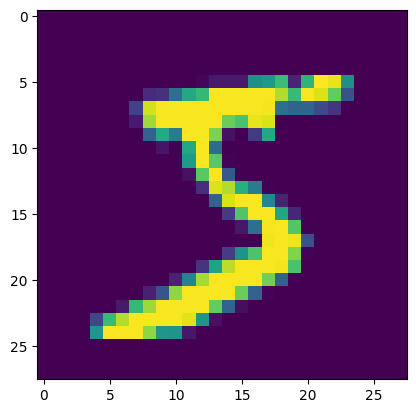

In [2]:
#Visualizando una muestra

np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[0]}')
print(f'Image:\n{training_images[0]}')

plt.imshow(training_images[0])


In [3]:
#Normalizando datos
training_images = training_images / 255.0
test_images = test_images / 255.0



In [4]:
#Construyendo modelo de clasificación
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(500, activation='sigmoid'),
                                 keras.layers.Dense(10, activation='softmax')])

#Compilando modelo
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenando modelo
history = model.fit(training_images, training_labels, epochs=20)

c:\Users\Simon R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8525 - loss: 0.5247
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9391 - loss: 0.2065
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9601 - loss: 0.1367
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.0944
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9763 - loss: 0.0797
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9811 - loss: 0.0615
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9836 - loss: 0.0528
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9873 - loss: 0.0418
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9893 - loss: 0.0372
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9914 - loss: 0.0307
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0279
Epoch 12/20
1875/1875 ━━━━━━━━

<Axes: >

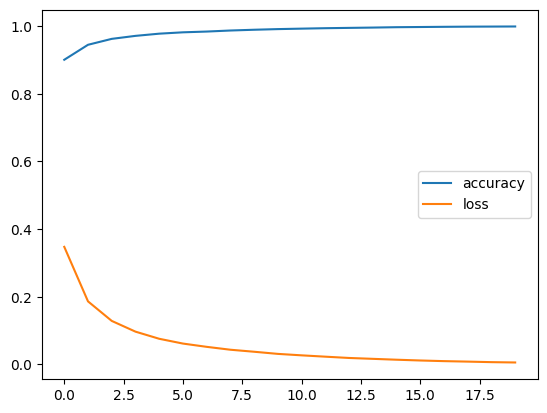

In [5]:
#Graficando historial de entrenamiento
df = pd.DataFrame(history.history)
df.plot()

In [6]:
loss, accuracy = model.evaluate(training_images, training_labels)
#Evaluando modelo en el conjunto de entrenamiento
print(f'Perdida en el conjunto de entrenamiento: {loss}')
print(f'Precision en el conjunto de entrenamiento: {accuracy}')

#Evaluando modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Perdida en el conjunto de prueba: {loss}')
print(f'Precision en el conjunto de prueba: {accuracy}')

#Calculando predicciones
predictions = model.predict(test_images)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9994 - loss: 0.0036
Perdida en el conjunto de entrenamiento: 0.003744801040738821
Precision en el conjunto de entrenamiento: 0.9993333220481873
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9806 - loss: 0.0728
Perdida en el conjunto de prueba: 0.062266796827316284
Precision en el conjunto de prueba: 0.9830999970436096
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9994 - loss: 0.0036


ValueError: operands could not be broadcast together with shapes (10000,10) (1,10000) 

<Axes: xlabel='Predicted', ylabel='True'>

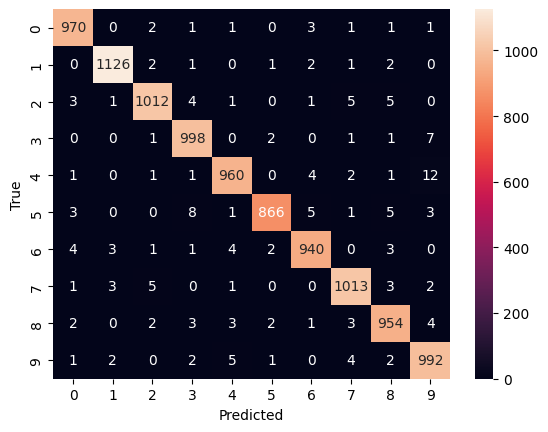

In [7]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
confusion_matrix = pd.crosstab(test_labels, np.argmax(predictions, axis=1), rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,022 (3.03 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 397,512 (1.52 MB)